In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_image(target_dir):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir

  img = mpimg.imread(target_folder )
  plt.imshow(img)

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Image shape: (1024, 1820, 3)


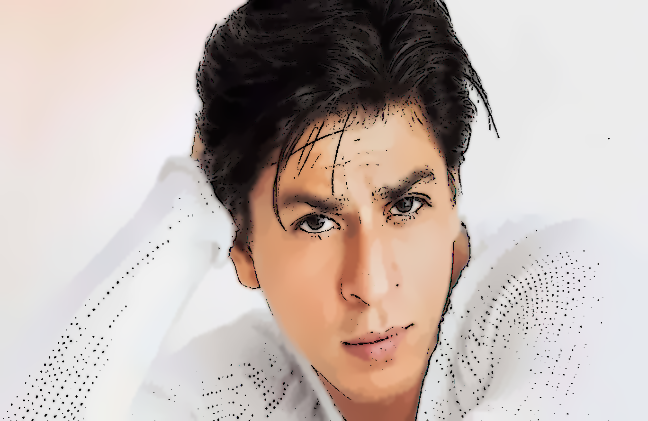

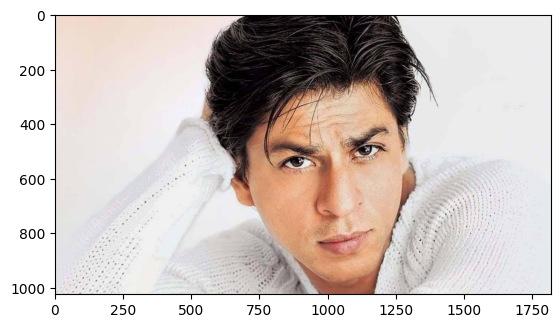

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

class Cartoonizer:
    """Cartoonizer effect
    A class that applies a cartoon effect to an image.
    The class uses a bilateral filter and adaptive thresholding to create
    a cartoon effect.
    """
    def init(self):
        pass

    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = cv2.resize(img_rgb, (1366, 768))
        numDownSamples = 2 # number of downscaling steps
        numBilateralFilters = 5  # number of bilateral filtering steps


        # -- STEP 1 --

        # Downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)

        # Repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

        # Upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)

        # -- STEPS 2 and 3 --
        # Convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 5)

        # -- STEP 4 --
        # Detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 5, 7)

        # -- STEP 5 --
        # Convert back to color so that it can be bit-ANDed with color image
        (x, y, z) = img_color.shape
        img_edge = cv2.resize(img_edge, (y, x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

        # Bitwise AND the color image and edge image
        cartoonized_img = cv2.bitwise_and(img_color, img_edge)

        # Resize the image to 400x200 pixels
        cartoonized_img = cv2.resize(cartoonized_img, (648, 421))

        return cartoonized_img

tmp_canvas = Cartoonizer()

file_name = "/content/srk1820_010818025119.jpg"  # File_name will come here
res = tmp_canvas.render(file_name)
view_image(file_name)

cv2.imwrite("Cartoon_version.jpg", res)
cv2_imshow(res)

cv2.waitKey(0)
cv2.destroyAllWindows()